In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

# 1. CNN을 활용한 MNIST Digits 인식

In [4]:
#라이브러리 준비
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical #삭제 -> One-hot encoding 하지 않음
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [6]:
#MNIST 데이터 불러오기
#Keras 제공, 70,000개의 영상을 학습 데이터 셋과 테스트 데이터 셋으로 분할하여 제공함
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('학습셋 이미지: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지: %d 개' % (X_test.shape[0]))

학습셋 이미지: 60000 개
테스트셋 이미지: 10000 개


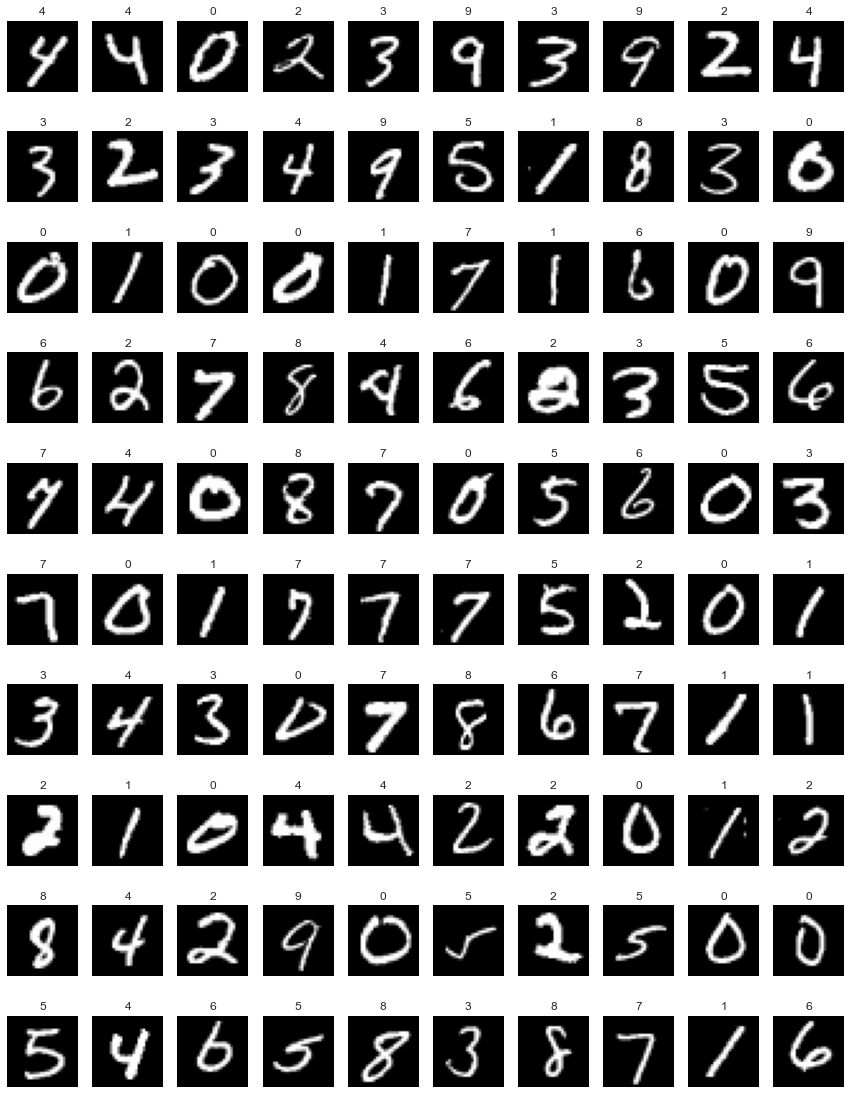

In [7]:
#영상 자료 확인
#숫자 출력 / 랜덤하게 100개씩 자료 보기
import random
n_samples = 100
indices = random.sample(range(X_train.shape[0]), n_samples) #6만개 중 n_samples만큼 인덱스만 랜덤하게 추출

plt.figure(figsize=(15, 20))
for i, idx in enumerate(indices):
    plt.subplot(10,10, i+1)
    plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255) #0을 검정색으로 #X_train = 이미지
    plt.title(Y_train[idx]) #Y_train = 정답
    plt.axis('off')
plt.show()
#실행할 때마다 다른 결과 출력

In [8]:
#데이터 전처리
#2차원 영상, 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

#0~255 값을 0~1 사이 값으로 Min_Max 정규화
X_train = X_train / 255.

#테스트셋 변환
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.

Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

print(X_train[0].shape)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 1) (10000, 1)


In [14]:
#CNN 설정
seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu')) #Conv1
model.add(MaxPooling2D(pool_size = 2)) #MP1
model.add(Conv2D(64, (3, 3), activation = 'relu')) #Conv2D(필터크기, 커널 사이즈) #Conv2
model.add(MaxPooling2D(pool_size = 2)) #MP2
model.add(Dropout(0.25)) #25%확률로 뉴런 탈락
model.add(Flatten()) #Flatten
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax')) #출력층
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #One-hot encoding 하지 않았을 때 sparse 사용

#모델 저장 폴더 설정
MODEL_DIR = 'd:/Ai/CNN_MnistModel/'
if not os.path.exists(MODEL_DIR):
     os.mkdir(MODEL_DIR) #디렉토리가 존재하지 않을 때 mkdir(make directory) -> 폴더 새로 생성

#모델 저장 조건 설정    
modelfile = MODEL_DIR + 'MNIST_CNN_best.h5'
checkpointer = ModelCheckpoint(filepath = modelfile, #ModelCheckpoint: 모델 저장에 필요한 함수
                               monitor = 'val_loss', verbose = 1,
                               save_best_only = True) #가장 좋은 모델일 때 저장

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

fit_history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50,
                        verbose = 0, batch_size = 200,
                        callbacks = [early_stopping_callback, checkpointer])

print("Train Accuracy:", model.evaluate(X_train, Y_train)[1])
print("Test Accuracy:", model.evaluate(X_test, Y_test)[1])


Epoch 00001: val_loss improved from inf to 0.06847, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00002: val_loss improved from 0.06847 to 0.04586, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00003: val_loss improved from 0.04586 to 0.03614, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00004: val_loss improved from 0.03614 to 0.03201, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00005: val_loss improved from 0.03201 to 0.02847, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00006: val_loss improved from 0.02847 to 0.02585, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00007: val_loss improved from 0.02585 to 0.02327, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00008: val_loss improved from 0.02327 to 0.02319, saving model to d:/Ai/CNN_MnistModel\MNIST_CNN_best.h5

Epoch 00009: val_loss did not improve from 0.02319

Epoch 00010: val_loss improved from 0.02319 to 0.02219,

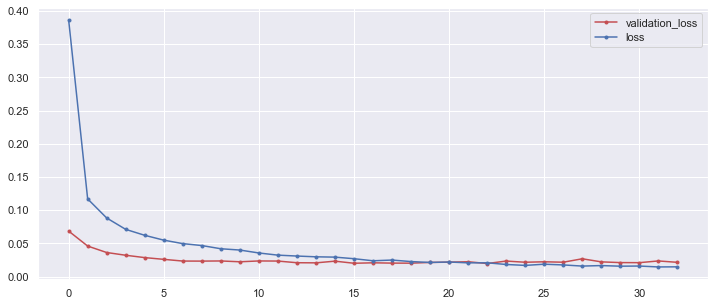

In [15]:
#학습 이력 확인하기
vloss = fit_history.history['val_loss'] # 테스트셋 loss
loss = fit_history.history['loss'] # 학습셋  

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, c='r', marker='.', label='validation_loss')
plt.plot(epoch, loss, c='b',  marker='.',label='loss')
plt.legend(loc='best')
plt.show()

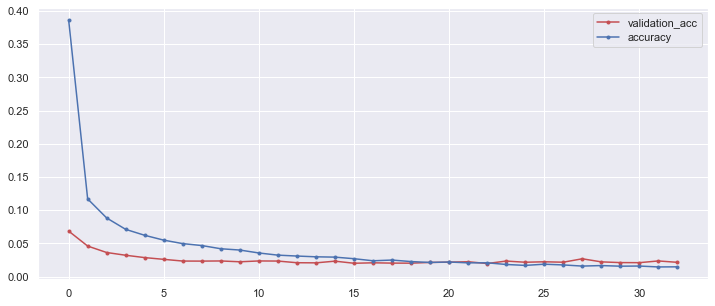

In [16]:
vacc = fit_history.history['val_loss'] # 테스트셋 loss
acc = fit_history.history['loss'] # 학습셋 정확도

plt.figure(figsize=(12,5))
epoch = np.arange(len(acc))
plt.plot(epoch, vacc, c='r', marker='.', label='validation_acc')
plt.plot(epoch, acc, c='b',  marker='.',label='accuracy')
plt.legend(loc='best')
plt.show()

# 2. 이미지 OCR- 연속 문자 인식 프로젝트
1. 이미지에서 숫자가

In [17]:
pip install imutils
#imutils 설치 후 kernal 재부팅하지 않고 아래 코드 바로 실행 가능

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=81d3ce177c2456d68c082d9b4644457cf44f99cba5878f0aef2ce27a7d8b64e5
  Stored in directory: c:\users\ictai\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [19]:
IMG_DIR="D:/Ai/img/ocr/"

## (1) 이미지에서 글자가 있는 영역 추출
- im.shape(M, N)
- 영상의 해상도 N * M
- N: 가로폭, M: 세로 높이

#### OpenCv에서의 이미지
- bitmap image
- 컬러 이미지: 3차원(y축, x축, 3) -> 3(B, G, R)
- opencv: B, G, R순서 (ex. Red (0, 0, 255)) / matplotlib: R, B, G 순서 (ex. Red(255, 0, 0))
- 픽셀의 위치 표현
1. 영상 좌표(x, y)
2. 행렬 위치(r, c)

#### contour 추출
- 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선을 연결한 선
- 검은색 배경에서 하얀색 대상을 찾는것 -> 대상은 흰색, 배경은 검은색으로 해야함

#### Object localization
- contour를 둘러싸는 사각형 정보로 변환

#### 사각형 그리기
- left-top-corner와 right-bottom corner를 연결하는 사각형을 그림
- cv2.rectangle(img, start, end, color, thickness(int))

#### 영상 크기 조절
- cv2. resize(img, dsize, fx, fy, interpolation)
- dsize: manual size, 가로, 세로 형태의 tuple
- interpolation: 보간법

In [20]:
#이미지에서 글자가 있는 영역 추출하기
im = cv2.imread(IMG_DIR+'numbers.PNG')

#흑백 영상으로 만들기
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #bgr영상을 gray로 변환
blur = cv2.GaussianBlur(gray, (5, 5), 0) #kernal size(5, 5) / 표준편차: 0  #영상에 대해 블러링
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) #작은 사각형 단위로 흑백 영상으로 변경  #이진화하기
#파라미터: src, maxValue, adaptiveMethod, thresholdType, blocksize, C(평균이나 가중평균에서 차감할 값)
#thresholding type "1" : cv2.THRESH_BINARY_INV -> 반전 / 큰 값은 검은색(255), 작은 값은 흰색(0)으로

# 윤곽 추출
contours = cv2.findContours(thresh,  #검은 바탕에 흰색으로 된 글자들을 찾아 반환
                            cv2.RETR_LIST, #찾을 수 있는 물체는 다 찾기(적용 X)
                            cv2.CHAIN_APPROX_SIMPLE)

contours = contours[1] if imutils.is_cv3() else contours[0] #contour 좌표만 선택 / tuple로 반환

# 추출한 윤곽을 반복 처리 -> 사각성분 찾기
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) #주변의 가장 작은 사각형 찾아 반환
    if h < 20: continue #너무 작으면 건너뛰기(ex. 잘못 찍은 점)
    red = (0, 0, 255)
    cv2.rectangle(im, (x, y), (x+w, y+h), red, 2) #굵기: 2

#파일로 저장하기
cv2.imwrite(IMG_DIR+'numbers-cnt.PNG', im)

True

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [21]:
#100개 숫자 이미지에 적용 -> 숫자 영역 추출
im = cv2.imread(IMG_DIR+'numbers100.PNG')

#흑백 영상으로 만들기
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #bgr영상을 gray로 변환
blur = cv2.GaussianBlur(gray, (5, 5), 0) #kernal size(5, 5) / 표준편차: 0  #영상에 대해 블러링
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) #작은 사각형 단위로 흑백 영상으로 변경  #이진화하기
#파라미터: src, maxValue, adaptiveMethod, thresholdType, blocksize, C(평균이나 가중평균에서 차감할 값)
#thresholding type "1" : cv2.THRESH_BINARY_INV -> 반전 / 큰 값은 검은색(255), 작은 값은 흰색(0)으로

# 윤곽 추출
contours = cv2.findContours(thresh,  #검은 바탕에 흰색으로 된 글자들을 찾아 반환
                            cv2.RETR_LIST, #찾을 수 있는 물체는 다 찾기(적용 O)
                            cv2.CHAIN_APPROX_SIMPLE)

contours = contours[1] if imutils.is_cv3() else contours[0] #contour 좌표만 선택 / tuple로 반환

# 추출한 윤곽을 반복 처리 -> 사각성분 찾기
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) #주변의 가장 작은 사각형 찾아 반환
    if h < 20: continue #너무 작으면 건너뛰기(ex. 잘못 찍은 점)
    red = (0, 0, 255)
    cv2.rectangle(im, (x, y), (x+w, y+h), red, 2) #굵기: 2
    
cv2.imwrite(IMG_DIR+'numbers100-cnt.PNG', im)

True

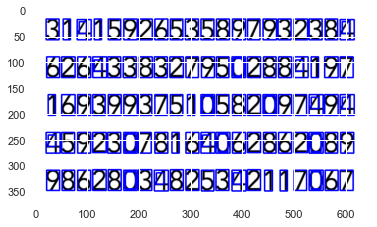

In [22]:
#결과보기
plt.imshow(im)
plt.show()
#영역 내의 다른 영역도 검출됨

### ==> 영역 내 다른 영역 검출 제거

In [23]:
# 이미지 읽어 들이기 
im = cv2.imread(IMG_DIR+'numbers100.PNG')

#흑백 영상으로 만들기
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #bgr영상을 gray로 변환
blur = cv2.GaussianBlur(gray, (5, 5), 0) #kernal size(5, 5) / 표준편차: 0  #영상에 대해 블러링
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) #작은 사각형 단위로 흑백 영상으로 변경  #이진화하기
#파라미터: src, maxValue, adaptiveMethod, thresholdType, blocksize, C(평균이나 가중평균에서 차감할 값)
#thresholding type "1" : cv2.THRESH_BINARY_INV -> 반전 / 큰 값은 검은색(255), 작은 값은 흰색(0)으로

# 윤곽 추출
contours = cv2.findContours(thresh,  #검은 바탕에 흰색으로 된 글자들을 찾아 반환
                            cv2.RETR_EXTERNAL, #외곽만 찾기
                            cv2.CHAIN_APPROX_SIMPLE)

contours = contours[1] if imutils.is_cv3() else contours[0] #contour 좌표만 선택 / tuple로 반환

# 추출한 윤곽을 반복 처리 -> 사각성분 찾기
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) #주변의 가장 작은 사각형 찾아 반환
    if h < 20: continue #너무 작으면 건너뛰기(ex. 잘못 찍은 점)
    red = (0, 0, 255)
    cv2.rectangle(im, (x, y), (x+w, y+h), red, 2) #굵기: 2
    
cv2.imwrite(IMG_DIR+'numbers100-cnt-new.PNG', im)

True

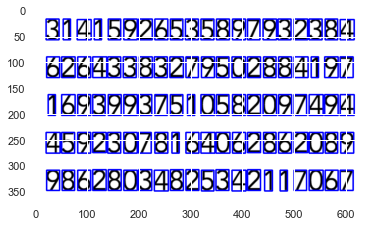

In [24]:
#결과보기
plt.imshow(im)
plt.show()
#영역 내의 다른 영역도 검출됨

## (2)  개별 숫자 영역 추출하여 영상 리스트 만들기

In [25]:
# 추출한 좌표 정렬하기 
rects = [] #사각형 정보
im_w = im.shape[1] #im.shape[0]: 행의 개수 / [1]: 열의 개수
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    if w < 10 or h < 10: continue # 너무 작으면 생략
    if w > im_w / 5: continue # 너무 크면 생략
    y2 = round(y / 10) * 10 # Y좌표 맞추기
    index = y2 * im_w  + x
    rects.append((index, x, y, w, h))
rects = sorted(rects, key=lambda x:x[0]) #정렬 #0초과
#sorted()함수: 비교하기 전에 각 리스트 요소에 대해 호출할 함수를 지정
print(rects[0:3])

[(12961, 21, 17, 25, 40), (12994, 54, 17, 14, 40), (13021, 81, 18, 27, 39)]


In [26]:
# 해당 영역의 이미지 데이터 추출 
X = [] #28*28 영상들 -> 신경망 모델의 입력값으로 사용
for i, r in enumerate(rects):
    index, x, y, w, h = r #r: 튜플
    num = gray[y:y+h,x:x+w] # 부분 이미지 추출 #행, 열 순서
    num = 255 - num # 반전
    # 정사각형 내부에 그림 옮기기
    ww = round((w if w > h else h) * 1.85)  #w, h 중 큰 값 선택
    
    #글자 한 가운데에 넣기
    spc = np.zeros((ww, ww))
    wy = (ww-h)//2
    wx = (ww-w)//2
    spc[wy:wy+h,wx:wx+w] = num
    
    num = cv2.resize(spc, (28, 28)) # MNIST 크기 맞추기
    X.append(num)
print(len(X))

100


In [27]:
X = np.array(X)
X.shape

(100, 28, 28)

##  (3) MLP 모델로 인식하기

In [28]:
from tensorflow.keras.models import load_model
modelfile = "d:/Ai/MnistModel/MNIST_digits_best_MLP.h5"
model = load_model(modelfile)

In [29]:
X_test = X.reshape(100, 28*28)
X_test.shape

(100, 784)

In [30]:
X_test = X_test.astype("float32") / 255

In [32]:
# 예측하기 
s = "31415926535897932384" + \
    "62643383279502884197" + \
    "16939937510582097494" + \
    "45923078164062862089" + \
    "98628034825342117067"
answer = list(s)

ng_list=[]
ok = 0
nlist = model.predict(np.array(X_test))
for i, n in enumerate(nlist):
    ans = n.argmax()
    if ans == int(answer[i]):
        ok += 1 #정답이면 1 증가
    else:
        print("[ng]", i, "번째", ans, "!=", answer[i], np.int32(n*100))
        ng_list.append(i)
print('오답 수:', len(ng_list),'\n정답률:', ok / len(nlist))

[ng] 11 번째 2 != 8 [ 8  1 61  0  3  8  2  2  2  9]
[ng] 18 번째 2 != 8 [10  0 45  0  3 11  2  2  3 18]
[ng] 26 번째 2 != 8 [ 6  1 73  0  2  5  1  2  1  5]
[ng] 34 번째 2 != 8 [11  0 43  0  2 11  1  2  2 22]
[ng] 35 번째 2 != 8 [ 7  1 67  0  2  6  1  2  1  7]
[ng] 52 번째 2 != 8 [ 5  1 71  0  3  4  1  3  1  7]
[ng] 67 번째 2 != 8 [12  0 50  0  2  6  0  3  1 22]
[ng] 74 번째 9 != 8 [13  0 34  0  2  8  0  3  1 35]
[ng] 78 번째 2 != 8 [13  0 36  0  2  7  0  3  1 34]
[ng] 81 번째 2 != 8 [ 9  0 50  0  1  8  0  6  1 18]
[ng] 84 번째 2 != 8 [ 4  1 67  0  2  7  5  1  4  4]
[ng] 88 번째 2 != 8 [ 3  1 70  0  2  6  5  1  4  3]
오답 수: 12 
정답률: 0.88


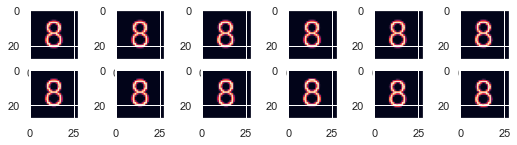

In [34]:
# 오답 출력
plt.figure(figsize=(9, 2))
for i, idx in enumerate(ng_list):
    plt.subplot(2,6, i+1) #12개 오답 => 2*6
    plt.imshow(X[idx])
plt.show()

## (4) CNN 모델로 인식하기

In [35]:
#모델 읽기
modelfile ='d:/Ai/CNN_MnistModel/MNIST_CNN_best.h5'
model = load_model(modelfile)

In [36]:
X_test = X.reshape(100, 28, 28, 1) #convolution 신경망은 3차원
X_test.shape

(100, 28, 28, 1)

In [37]:
# 예측하기 
s = "31415926535897932384" + \
    "62643383279502884197" + \
    "16939937510582097494" + \
    "45923078164062862089" + \
    "98628034825342117067"
answer = list(s)

ng_list=[]
ok = 0
nlist = model.predict(np.array(X_test))
for i, n in enumerate(nlist):
    ans = n.argmax()
    if ans == int(answer[i]):
        ok += 1 #정답이면 1 증가
    else:
        print("[ng]", i, "번째", ans, "!=", answer[i], np.int32(n*100))
        ng_list.append(i)
print('오답 수:', len(ng_list),'\n정답률:', ok / len(nlist))

[ng] 47 번째 3 != 7 [ 0  0  0 96  0  0  0  3  0  0]
오답 수: 1 
정답률: 0.99


# 3. OpenCV를 활용 개인정보 비식별화

## (1) 얼굴에 사각형표시하기

In [38]:
IMG_DIR = "D:/Ai/img/face/"

In [39]:
#입력 파일 지정하기
image_file =IMG_DIR+ "Lena.jpg"
#캐스케이드 파일의 경로 지정하기
cascade_file = IMG_DIR+"haarcascade_frontalface_alt.xml"

#이미지 읽어들이기
image = cv2.imread(image_file)
#그레이 스케일로 변환하기
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#얼굴 인식 특징 파일 읽어들이기
cascade = cv2.CascadeClassifier(cascade_file)

#얼굴 인식 실행하기
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150)) #얼굴사이즈가 150*150보다 크면 잘라냄

if len(face_list) > 0:
    #인식한 부분 표시하기
    print(face_list)
    color = (0, 0, 255) #Red
    for face in face_list:
        x, y, w, h = face
        cv2.rectangle(image, (x, y), (x+w, y+h), color, thickness=8)
    #파일로 출력하기 
    cv2.imwrite(IMG_DIR+"facedetect-output.PNG", image)
else:
    print("no face")

[[123 112 168 168]]


In [48]:
def face_detection(IMG_DIR, image_file, rst_file, min_size=(150,150)):
    #캐스케이드 파일의 경로 지정하기
    cascade_file = IMG_DIR+"haarcascade_frontalface_alt.xml"

    #이미지 읽어들이기
    image = cv2.imread(image_file)
    #그레이 스케일로 변환하기
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #얼굴 인식 특징 파일 읽어들이기
    cascade = cv2.CascadeClassifier(cascade_file)

    #얼굴 인식 실행하기
    face_list = cascade.detectMultiScale(image_gs,
        scaleFactor=1.1,
        minNeighbors=1,
        minSize=min_size) #얼굴사이즈가 150*150보다 크면 잘라냄

    if len(face_list) > 0:
        #인식한 부분 표시하기
        print(face_list)
        color = (0, 0, 255) #Red
        for face in face_list:
            x, y, w, h = face
            cv2.rectangle(image, (x, y), (x+w, y+h), color, thickness=8)
        #파일로 출력하기 
        cv2.imwrite(rst_file, image)
    else:
        print("no face")

In [49]:
def displayResult(image_file, rst_file):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    im = plt.imread(image_file)
    plt.xlabel('Original')
    plt.grid(False)
    plt.imshow(im)
    
    plt.subplot(1,2,2)
    im = plt.imread(rst_file)
    plt.xlabel('Result')
    plt.grid(False)
    plt.imshow(im)
    plt.show()

[[123 112 168 168]]


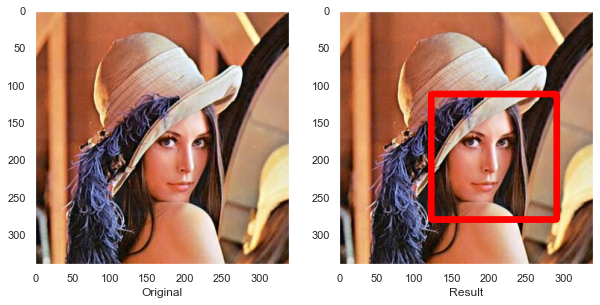

In [50]:
image_file =IMG_DIR+ "Lena.jpg"
rst_file= IMG_DIR+"Lena_facedetect-output.PNG"

face_detection(IMG_DIR, image_file, rst_file)
displayResult(image_file, rst_file)

[[ 67 528  80  80]
 [847  12  87  87]
 [918 292 107 107]
 [484  70 102 102]
 [802 499 130 130]
 [939 572 144 144]
 [648 146 172 172]
 [385 367 217 217]]


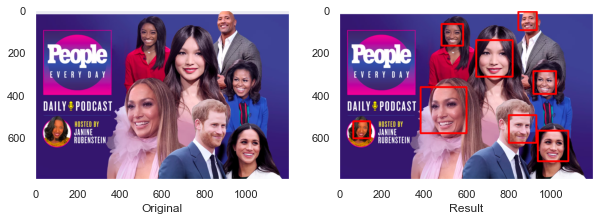

In [51]:
image_file =IMG_DIR+ "people.png"
rst_file= IMG_DIR+"people_facedetect-output.PNG"

face_detection(IMG_DIR, image_file, rst_file, (70, 70)) #얼굴크기가 100*100 이상인 사람을 찾으시오.
displayResult(image_file, rst_file)

## (2) 얼굴 비식별화

In [ ]:
IMG_DIR = "d:/Ai/img/face/"

###  ㉠ 모자이크 방식

[[123 112 168 168]]


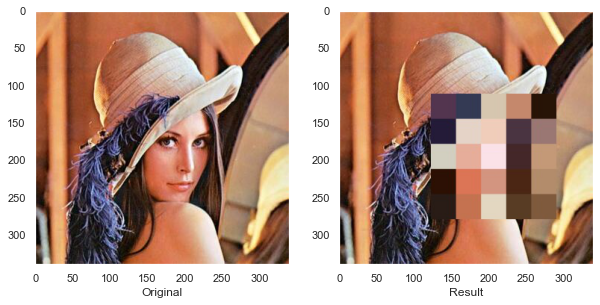

In [59]:
image_file =IMG_DIR+ "Lena.jpg"
# 출력 파일 이름
output_file = IMG_DIR+"Lena-mosaic.jpg"
mosaic_rate = 30   # 5, 10, 30, 50, 70 으로 테스트 해보기  #30 => 1/30 (모자이크 사각형의 크기)

# 이미지 읽어 --> 얼굴 부위 찾기
#캐스케이드 파일의 경로 지정하기
cascade_file = IMG_DIR + "haarcascade_frontalface_alt.xml"

#이미지 읽어들이기
image = cv2.imread(image_file)
#그레이 스케일로 변환하기
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#얼굴 인식 특징 파일 읽어들이기
cascade = cv2.CascadeClassifier(cascade_file)

#얼굴 인식 실행하기
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150)) #얼굴사이즈가 150*150보다 크면 잘라냄

if len(face_list) == 0:
    print("no_face")
    quit()

# 얼굴부분을 모자이크 처리
print(face_list)
color = (0, 0, 255)
for (x,y,w,h) in face_list:
    #얼굴 부분 자르기
    face_img = image[y:y+h, x:x+w]
    #자른 이미지를 지정한 배율로 확대/축소하기
    face_img = cv2.resize(face_img, (w//mosaic_rate, h//mosaic_rate)) #축소
    #확대/축소한 그림을 원래 크기로 돌리기
    face_img = cv2.resize(face_img, (w, h), 
        interpolation=cv2.INTER_AREA) #확대
    #원래 이미지에 붙이기
    image[y:y+h, x:x+w] = face_img
#렌더링 결과를 파일에 출력
cv2.imwrite(output_file, image)

displayResult(image_file, output_file)

###  ㉡ Blurring 방식

[[123 112 168 168]]


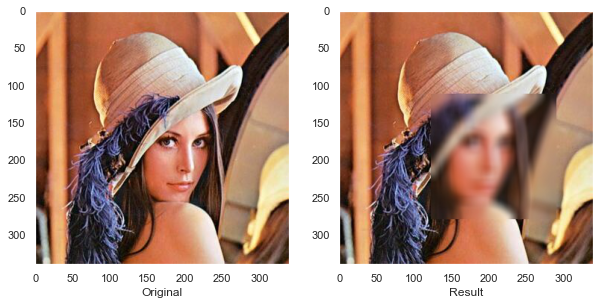

In [57]:
image_file =IMG_DIR+ "Lena.jpg"
# 출력 파일 이름
output_file = IMG_DIR+"Lena-blur.jpg"
mosaic_rate = 30   # 5, 10, 30, 50, 70 으로 테스트 해보기  #30 => 1/30

# 이미지 읽어 --> 얼굴 부위 찾기
#캐스케이드 파일의 경로 지정하기
cascade_file = IMG_DIR + "haarcascade_frontalface_alt.xml"

#이미지 읽어들이기
image = cv2.imread(image_file)
#그레이 스케일로 변환하기
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#얼굴 인식 특징 파일 읽어들이기
cascade = cv2.CascadeClassifier(cascade_file)

#얼굴 인식 실행하기
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150)) #얼굴사이즈가 150*150보다 크면 잘라냄

if len(face_list) == 0:
    print("no_face")
    quit()

# 얼굴부분을 블루어링
print(face_list)
color = (0, 0, 255)
for (x,y,w,h) in face_list:
    #얼굴 부분 자르기
    face_img = image[y:y+h, x:x+w]
    #블루어링
    face_img = cv2.GaussianBlur(face_img, (15, 15), 30) #(5, 5)도 해보기 / 사이즈를 크게할수록 얼굴이 흐릿해짐  #30: 표준편차
    #원래 이미지에 붙이기
    image[y:y+h, x:x+w] = face_img
#렌더링 결과를 파일에 출력
cv2.imwrite(output_file, image)

displayResult(image_file, output_file)